In [1]:
from __future__ import print_function

from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.15.0


[]

In [3]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [4]:
batch_size = 128
num_classes = 10
epochs = 60

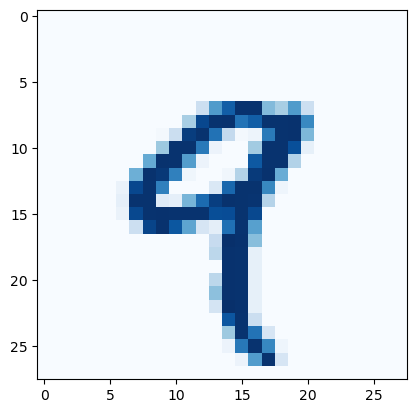

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.imshow(x_train[4], cmap='Blues')

In [15]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [16]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [17]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.01))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/60


469/469 [==============================] - 3s 5ms/step - loss: 0.2272 - accuracy: 0.9302 - val_loss: 0.1206 - val_accuracy: 0.9609
Epoch 2/60
469/469 [==============================] - 2s 5ms/step - loss: 0.0832 - accuracy: 0.9747 - val_loss: 0.0684 - val_accuracy: 0.9781
Epoch 3/60
469/469 [==============================] - 2s 5ms/step - loss: 0.0546 - accuracy: 0.9827 - val_loss: 0.0687 - val_accuracy: 0.9807
Epoch 4/60
469/469 [==============================] - 3s 6ms/step - loss: 0.0389 - accuracy: 0.9880 - val_loss: 0.0648 - val_accuracy: 0.9798
Epoch 5/60
469/469 [==============================] - 3s 6ms/step - loss: 0.0274 - accuracy: 0.9912 - val_loss: 0.0683 - val_accuracy: 0.9809
Epoch 6/60
469/469 [==============================] - 2s 5ms/step - loss: 0.0204 - accuracy: 0.9934 - val_loss: 0.0727 - val_accuracy: 0.9814
Epoch 7/60
469/469 [==============================] - 2s 5ms/step - loss: 0.0160 - accuracy: 0.9951 - val_loss: 0.0638 - val_accuracy: 0.9827
Epoc

In [20]:
score = model.evaluate(x_test,y_test,verbose = 0)
print('test loss',score[0])
print('test acc',score[1])

test loss 0.0941191092133522
test acc 0.9854000210762024


In [21]:
predictions = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [22]:
y_labels = np.argmax(y_test, axis=1)

In [23]:
predictions = np.argmax(predictions, axis=1)

In [24]:
cm =confusion_matrix(y_labels, predictions)

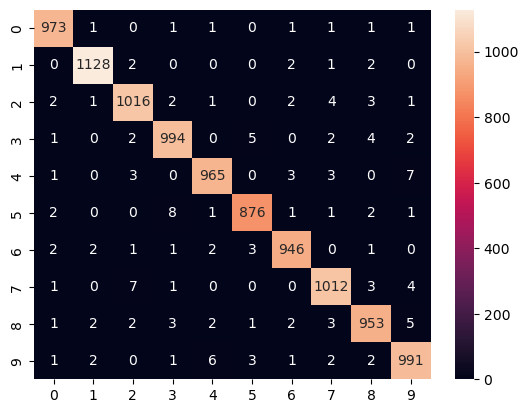

In [25]:
hm = sns.heatmap(cm,annot= True, fmt = 'd')